# CV evaluation with lasso regression on RA & PD datasets (within each dataset separately)

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import Pool
import warnings
import microscope as mc
import pickle

from sklearn.metrics import classification_report

sns.set_style("white")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
base_d = "/Users/erankotler/dinamo"
data_d = os.path.join(base_d, "data/gse_data_20231002")

results_d = os.path.join(base_d, "resutls")
models_d = os.path.join(base_d, "models")


In [3]:
[d for d in os.listdir(data_d) if d.startswith("GSE")]

['GSE145361',
 'GSE111223',
 'GSE190348',
 'GSE42861',
 'GSE111942',
 'GSE87095',
 'GSE147221',
 'GSE175364',
 'GSE111629',
 'GSE121192']

In [4]:
# gse_acc = "GSE111223" # PD ~260 samps
# gse_acc = "GSE111629" # PD ~570 samps
# gse_acc = "GSE145361" # PD, ~1800 samps

PD_datasets = ["GSE145361","GSE111629", "GSE190348", "GSE111223"]
RA_datasets = ["GSE42861","GSE111942","GSE121192","GSE87095"] # "GSE175364" is a 78-patient dataset for prediction of  undifferentiated arthritis (UA)=>RA progression with only 6 controls

In [5]:
%%time
datasets_to_analyze = RA_datasets #PD_datasets # RA_datasets
RA_CV_results_l1 = {}

for gse_acc in datasets_to_analyze:
    print("Processing", gse_acc)
    gse_d = os.path.join(data_d, gse_acc)
    data = mc.Dataset(gse_d=gse_d)
    data.load_data() 
    # data.load_data(max_CpGs=50000)#, max_samps=200) # For debugging
    data.organize_data()
    
    # Examine original label names
    print("Original labels:", data.orig_label_names)
    print("Number of samples:", data.df.shape[0])
    
    cv_res = mc.cv_train_test(
        data, 
        CV = 10, # "LOO" # 10 #"LOO"
        penalty = 'l1', 
        internalCV_folds = 3,
        nan_policy="impute_by_median",
        feat_selection='wilcox',
        feat_selection_pval_thresh=0.05)

    RA_CV_results_l1[gse_acc] = cv_res
    
    # save results to disk
    out_f = os.path.join(results_d, gse_acc + "_l1_cv_res_v0.dat")
    pickle.dump(cv_res, open(out_f, 'wb'))
    print ("CV results saved to", out_f)
    print("***************************************************************************\n")

Processing GSE42861
Target label counts (0/1): 335 / 354
Original labels: ['control' 'case']
Number of samples: 689
Starting cross validation
Starting fold 0 - Train-test splitting
CV fold 0 Train size: 620, test size: 69 (fract positives in train: 0.518)
Imputing missing values, elapsed time: 0.7 sec
Starting feature selection, elapsed time: 5.8 sec
Selecting features using wilcoxon
Retained 188275 features
Feature selection complete, ready for training, elapsed time: 73.1 sec
Fold complete, fold time: 113.2 sec
Starting fold 1 - Train-test splitting
CV fold 1 Train size: 620, test size: 69 (fract positives in train: 0.523)
Imputing missing values, elapsed time: 0.9 sec
Starting feature selection, elapsed time: 6.3 sec
Selecting features using wilcoxon
Retained 197843 features
Feature selection complete, ready for training, elapsed time: 76.9 sec
Fold complete, fold time: 118.8 sec
Starting fold 2 - Train-test splitting
CV fold 2 Train size: 620, test size: 69 (fract positives in trai

In [6]:
%%time
datasets_to_analyze = RA_datasets #PD_datasets # RA_datasets
RA_CV_results_l2 = {}

for gse_acc in datasets_to_analyze:
    print("Processing", gse_acc)
    gse_d = os.path.join(data_d, gse_acc)
    data = mc.Dataset(gse_d=gse_d)
    data.load_data() 
    # data.load_data(max_CpGs=50000, max_samps=200) # For debugging
    data.organize_data()
    
    # Examine original label names
    print("Original labels:", data.orig_label_names)
    print("Number of samples:", data.df.shape[0])
    
    cv_res = mc.cv_train_test(
        data, 
        CV = 10, # "LOO" # 10 #"LOO"
        penalty = 'l2', 
        internalCV_folds = 3,
        nan_policy="impute_by_median",
        feat_selection='wilcox',
        feat_selection_pval_thresh=0.05)

    RA_CV_results_l2[gse_acc] = cv_res
    
    # save results to disk
    out_f = os.path.join(results_d, gse_acc + "_l2_cv_res_v0.dat")
    pickle.dump(cv_res, open(out_f, 'wb'))
    print ("CV results saved to", out_f)
    print("***************************************************************************\n")

Processing GSE42861
Target label counts (0/1): 335 / 354
Original labels: ['control' 'case']
Number of samples: 689
Starting cross validation
Starting fold 0 - Train-test splitting
CV fold 0 Train size: 620, test size: 69 (fract positives in train: 0.518)
Imputing missing values, elapsed time: 1.0 sec
Starting feature selection, elapsed time: 6.3 sec
Selecting features using wilcoxon
Retained 188275 features
Feature selection complete, ready for training, elapsed time: 74.9 sec
Fold complete, fold time: 147.6 sec
Starting fold 1 - Train-test splitting
CV fold 1 Train size: 620, test size: 69 (fract positives in train: 0.523)
Imputing missing values, elapsed time: 1.0 sec
Starting feature selection, elapsed time: 6.5 sec
Selecting features using wilcoxon
Retained 197843 features
Feature selection complete, ready for training, elapsed time: 78.1 sec
Fold complete, fold time: 155.6 sec
Starting fold 2 - Train-test splitting
CV fold 2 Train size: 620, test size: 69 (fract positives in trai

In [7]:
%%time
datasets_to_analyze = PD_datasets # RA_datasets
PD_CV_results_l1 = {}

for gse_acc in datasets_to_analyze:
    print("Processing", gse_acc)
    gse_d = os.path.join(data_d, gse_acc)
    data = mc.Dataset(gse_d=gse_d)
    # data.load_data() 
    data.load_data(max_samps=600) # For debugging max_CpGs=50000, 
    data.organize_data()
    
    # Examine original label names
    print("Original labels:", data.orig_label_names)
    print("Number of samples:", data.df.shape[0])
    
    cv_res = mc.cv_train_test(
        data, 
        CV = 10, # "LOO" # 10 #"LOO"
        penalty = 'l1', 
        internalCV_folds = 3,
        nan_policy="impute_by_median",
        feat_selection='wilcox',
        feat_selection_pval_thresh=0.05)

    PD_CV_results_l1[gse_acc] = cv_res
    
    # save results to disk
    out_f = os.path.join(results_d, gse_acc + "_l2_cv_res_v0.dat")
    pickle.dump(cv_res, open(out_f, 'wb'))
    print ("CV results saved to", out_f)
    print("***************************************************************************\n")

Processing GSE145361
Target label counts (0/1): 287 / 313
Original labels: ['control' 'case']
Number of samples: 600
Starting cross validation
Starting fold 0 - Train-test splitting
CV fold 0 Train size: 540, test size: 60 (fract positives in train: 0.520)
Imputing missing values, elapsed time: 1.0 sec
Starting feature selection, elapsed time: 14.2 sec
Selecting features using wilcoxon
Retained 113827 features
Feature selection complete, ready for training, elapsed time: 105.8 sec
Fold complete, fold time: 128.2 sec
Starting fold 1 - Train-test splitting
CV fold 1 Train size: 540, test size: 60 (fract positives in train: 0.530)
Imputing missing values, elapsed time: 1.2 sec
Starting feature selection, elapsed time: 14.4 sec
Selecting features using wilcoxon
Retained 106047 features
Feature selection complete, ready for training, elapsed time: 106.3 sec
Fold complete, fold time: 125.1 sec
Starting fold 2 - Train-test splitting
CV fold 2 Train size: 540, test size: 60 (fract positives in

In [8]:
%%time
datasets_to_analyze = PD_datasets # RA_datasets
PD_CV_results_l2 = {}

for gse_acc in datasets_to_analyze:
    print("Processing", gse_acc)
    gse_d = os.path.join(data_d, gse_acc)
    data = mc.Dataset(gse_d=gse_d)
    # data.load_data() 
    data.load_data(max_samps=600) # For debugging max_CpGs=50000, 
    data.organize_data()
    
    # Examine original label names
    print("Original labels:", data.orig_label_names)
    print("Number of samples:", data.df.shape[0])
    
    cv_res = mc.cv_train_test(
        data, 
        CV = 10, # "LOO" 
        penalty = 'l2', 
        internalCV_folds = 3,
        nan_policy="impute_by_median",
        feat_selection='wilcox',
        feat_selection_pval_thresh=0.05)

    PD_CV_results_l2[gse_acc] = cv_res
    
    # save results to disk
    out_f = os.path.join(results_d, gse_acc + "_l2_cv_res_v0.dat")
    pickle.dump(cv_res, open(out_f, 'wb'))
    print ("CV results saved to", out_f)
    print("***************************************************************************\n")

Processing GSE145361
Target label counts (0/1): 287 / 313
Original labels: ['control' 'case']
Number of samples: 600
Starting cross validation
Starting fold 0 - Train-test splitting
CV fold 0 Train size: 540, test size: 60 (fract positives in train: 0.520)
Imputing missing values, elapsed time: 1.2 sec
Starting feature selection, elapsed time: 15.2 sec
Selecting features using wilcoxon
Retained 113827 features
Feature selection complete, ready for training, elapsed time: 106.8 sec
Fold complete, fold time: 151.3 sec
Starting fold 1 - Train-test splitting
CV fold 1 Train size: 540, test size: 60 (fract positives in train: 0.530)
Imputing missing values, elapsed time: 1.0 sec
Starting feature selection, elapsed time: 13.7 sec
Selecting features using wilcoxon
Retained 106047 features
Feature selection complete, ready for training, elapsed time: 105.4 sec
Fold complete, fold time: 149.3 sec
Starting fold 2 - Train-test splitting
CV fold 2 Train size: 540, test size: 60 (fract positives in

### Schizophrenia

In [12]:
Sch_datasets = ["GSE147221"] # ,"GSE41169" data unavailable

In [11]:
%%time
datasets_to_analyze = Sch_datasets
Sch_CV_results_l2 = {}

for gse_acc in datasets_to_analyze:
    print("Processing", gse_acc)
    gse_d = os.path.join(data_d, gse_acc)
    data = mc.Dataset(gse_d=gse_d)
    # data.load_data() 
    data.load_data(max_samps=600) # For debugging max_CpGs=50000, 
    data.organize_data()
    
    # Examine original label names
    print("Original labels:", data.orig_label_names)
    print("Number of samples:", data.df.shape[0])
    
    cv_res = mc.cv_train_test(
        data, 
        CV = 10, # "LOO" 
        penalty = 'l2', 
        internalCV_folds = 3,
        nan_policy="impute_by_median",
        feat_selection='wilcox',
        feat_selection_pval_thresh=0.05)

    Sch_CV_results_l2[gse_acc] = cv_res
    
    # save results to disk
    out_f = os.path.join(results_d, gse_acc + "_l2_cv_res_v0.dat")
    pickle.dump(cv_res, open(out_f, 'wb'))
    print ("CV results saved to", out_f)
    print("***************************************************************************\n")

Processing GSE147221
Target label counts (0/1): 298 / 302
Original labels: ['case' 'control']
Number of samples: 600
Starting cross validation
Starting fold 0 - Train-test splitting
CV fold 0 Train size: 540, test size: 60 (fract positives in train: 0.502)
Imputing missing values, elapsed time: 1.1 sec
Starting feature selection, elapsed time: 14.0 sec
Selecting features using wilcoxon
Retained 193289 features
Feature selection complete, ready for training, elapsed time: 105.1 sec
Fold complete, fold time: 150.9 sec
Starting fold 1 - Train-test splitting
CV fold 1 Train size: 540, test size: 60 (fract positives in train: 0.511)
Imputing missing values, elapsed time: 1.0 sec
Starting feature selection, elapsed time: 14.0 sec
Selecting features using wilcoxon
Retained 194575 features
Feature selection complete, ready for training, elapsed time: 105.8 sec
Fold complete, fold time: 157.8 sec
Starting fold 2 - Train-test splitting
CV fold 2 Train size: 540, test size: 60 (fract positives in

FileNotFoundError: [Errno 2] No such file or directory: '/Users/erankotler/dinamo/data/gse_data_20231002/GSE41169/matrix_beta.tsv'

In [13]:
%%time
datasets_to_analyze = Sch_datasets
Sch_CV_results_l1 = {}

for gse_acc in datasets_to_analyze:
    print("Processing", gse_acc)
    gse_d = os.path.join(data_d, gse_acc)
    data = mc.Dataset(gse_d=gse_d)
    data.load_data() 
    # data.load_data(max_samps=600) # For debugging max_CpGs=50000, 
    data.organize_data()
    
    # Examine original label names
    print("Original labels:", data.orig_label_names)
    print("Number of samples:", data.df.shape[0])
    
    cv_res = mc.cv_train_test(
        data, 
        CV = 10, # "LOO" 
        penalty = 'l1', 
        internalCV_folds = 3,
        nan_policy="impute_by_median",
        feat_selection='wilcox',
        feat_selection_pval_thresh=0.05)

    Sch_CV_results_l2[gse_acc] = cv_res
    
    # save results to disk
    out_f = os.path.join(results_d, gse_acc + "_l1_cv_res_v0.dat")
    pickle.dump(cv_res, open(out_f, 'wb'))
    print ("CV results saved to", out_f)
    print("***************************************************************************\n")

Processing GSE147221
Target label counts (0/1): 331 / 348
Original labels: ['case' 'control']
Number of samples: 679
Starting cross validation
Starting fold 0 - Train-test splitting
CV fold 0 Train size: 611, test size: 68 (fract positives in train: 0.509)
Imputing missing values, elapsed time: 1.2 sec
Starting feature selection, elapsed time: 8.6 sec
Selecting features using wilcoxon
Retained 207429 features
Feature selection complete, ready for training, elapsed time: 111.0 sec
Fold complete, fold time: 156.1 sec
Starting fold 1 - Train-test splitting
CV fold 1 Train size: 611, test size: 68 (fract positives in train: 0.520)
Imputing missing values, elapsed time: 1.4 sec
Starting feature selection, elapsed time: 8.7 sec
Selecting features using wilcoxon
Retained 214589 features
Feature selection complete, ready for training, elapsed time: 112.1 sec
Fold complete, fold time: 157.8 sec
Starting fold 2 - Train-test splitting
CV fold 2 Train size: 611, test size: 68 (fract positives in t

# --- END OF NOTEBOOK ---

#### TO DO - Rerun PD with entire data

### Debugging stuff

In [273]:
gse_acc = "GSE121192"
gse_d = os.path.join(data_d, gse_acc)
data = mc.Dataset(gse_d=gse_d)
data.load_data(max_CpGs=50000)#, max_samps=50) 
data.organize_data()

Target label counts (0/1): 16 / 30


In [274]:
data.y.value_counts()

1.0    30
0.0    16
Name: count, dtype: int64

In [275]:
data.df.head()

cg00000029  cg00000108  cg00000109  cg00000165  cg00000236  \
GSM3427639    0.489674    0.970901    0.934324    0.167923    0.807739   
GSM3427625    0.783458         NaN         NaN         NaN         NaN   
GSM3427626    0.769447    0.972417    0.906328    0.396645    0.939122   
GSM3427644    0.581425    0.969801    0.940581    0.232248    0.740743   
GSM3427635    0.486887    0.970310    0.949697    0.207570    0.707721   

            cg00000289  cg00000292  cg00000321  cg00000363  cg00000622  ...  \
GSM3427639    0.817810    0.853751    0.224321    0.345042    0.017054  ...   
GSM3427625         NaN    0.868898    0.283165    0.417663    0.014139  ...   
GSM3427626    0.789392    0.902351    0.383123    0.383661    0.015736  ...   
GSM3427644    0.782575    0.875173    0.335452    0.432475    0.015218  ...   
GSM3427635    0.790012    0.811613    0.209522    0.337576    0.013981  ...   

            cg02455797  cg02455803  cg02455820  cg02455827  cg02455836  \
GSM3427639    0.833061    0.020768    0.112676    0.879540    0.983849   
GSM3427625    0.878493    0.025093    0.096117    0.898236    0.984983   
GSM3427626    0.781869    0.027404    0.169894    0.880735    0.986625   
GSM3427644    0.806722    0.025398    0.126842    0.876903    0.987728   
GSM3427635    0.783549    0.028175    0.107436    0.879318    0.987014   

            cg02455868  cg02456087  cg02456218  cg02456219  cg02456226  
GSM3427639    0.922799    0.120537    0.859151    0.057736    0.035534  
GSM3427625         NaN    0.254438         NaN    0.068643    0.166669  
GSM3427626    0.952526    0.169433    0.840767    0.043526    0.178105  
GSM3427644    0.917339    0.131432    0.876083    0.052380    0.037209  
GSM3427635    0.936205    0.111144    0.932020    0.058921    0.045682  

[5 rows x 50000 columns]

In [276]:
data.df_filt = data.df.dropna(axis=1)

In [277]:
data.df_filt.shape

(46, 32417)

In [278]:
data.X = data.df_filt.values

In [279]:
data.X.shape, data.y.shape

((46, 32417), (46,))

In [280]:
data.y.head()

GSM3427639    1.0
GSM3427625    1.0
GSM3427626    1.0
GSM3427644    1.0
GSM3427635    0.0
dtype: float64

In [281]:
data.df.head()

cg00000029  cg00000108  cg00000109  cg00000165  cg00000236  \
GSM3427639    0.489674    0.970901    0.934324    0.167923    0.807739   
GSM3427625    0.783458         NaN         NaN         NaN         NaN   
GSM3427626    0.769447    0.972417    0.906328    0.396645    0.939122   
GSM3427644    0.581425    0.969801    0.940581    0.232248    0.740743   
GSM3427635    0.486887    0.970310    0.949697    0.207570    0.707721   

            cg00000289  cg00000292  cg00000321  cg00000363  cg00000622  ...  \
GSM3427639    0.817810    0.853751    0.224321    0.345042    0.017054  ...   
GSM3427625         NaN    0.868898    0.283165    0.417663    0.014139  ...   
GSM3427626    0.789392    0.902351    0.383123    0.383661    0.015736  ...   
GSM3427644    0.782575    0.875173    0.335452    0.432475    0.015218  ...   
GSM3427635    0.790012    0.811613    0.209522    0.337576    0.013981  ...   

            cg02455797  cg02455803  cg02455820  cg02455827  cg02455836  \
GSM3427639    0.833061    0.020768    0.112676    0.879540    0.983849   
GSM3427625    0.878493    0.025093    0.096117    0.898236    0.984983   
GSM3427626    0.781869    0.027404    0.169894    0.880735    0.986625   
GSM3427644    0.806722    0.025398    0.126842    0.876903    0.987728   
GSM3427635    0.783549    0.028175    0.107436    0.879318    0.987014   

            cg02455868  cg02456087  cg02456218  cg02456219  cg02456226  
GSM3427639    0.922799    0.120537    0.859151    0.057736    0.035534  
GSM3427625         NaN    0.254438         NaN    0.068643    0.166669  
GSM3427626    0.952526    0.169433    0.840767    0.043526    0.178105  
GSM3427644    0.917339    0.131432    0.876083    0.052380    0.037209  
GSM3427635    0.936205    0.111144    0.932020    0.058921    0.045682  

[5 rows x 50000 columns]

In [282]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, LeaveOneOut, train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [283]:
X_train, X_test, y_train, y_test = train_test_split(data.X, data.y, test_size=0.2, random_state=44)

In [284]:
X_train.shape, X_test.shape

((36, 32417), (10, 32417))

In [285]:
clf = LogisticRegressionCV(cv=3, max_iter=1000, penalty='l2')

In [286]:
clf.fit(X_train, y_train)

LogisticRegressionCV(cv=3, max_iter=1000)

In [287]:
clf.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [288]:
clf.C_

array([2.7825594])

In [289]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [290]:
y_pred_prob

array([0.91217269, 0.87903408, 0.92292885, 0.82579103, 0.95356712,
       0.939055  , 0.93522591, 0.99236006, 0.32852942, 0.94901905])

In [291]:
y_test.value_counts()

1.0    9
0.0    1
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='pred_prob'>

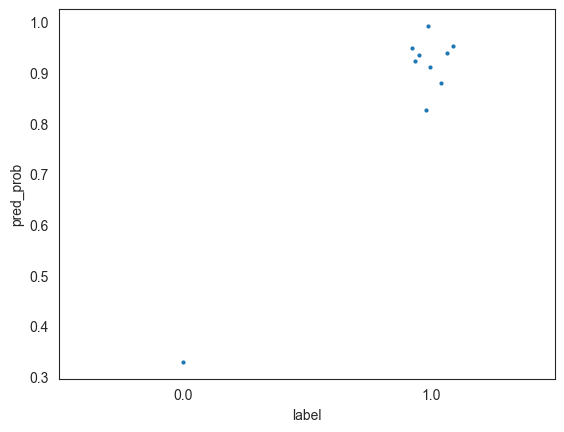

In [292]:
sns.stripplot(data=pd.DataFrame({"label":y_test, "pred_prob":y_pred_prob}),
                x="label", y="pred_prob", s=3)

In [293]:
rep = classification_report(y_test, y_pred > 0.5)
print(rep)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [294]:
cv_res = mc.cv_train_test(
        data, 
        CV = 5, # "LOO" # 10 #"LOO"
        penalty = 'l2', #None, #'l2', 
        internalCV_folds = 3,
        nan_policy="impute_by_median",
        feat_selection=None,#'wilcox',
        feat_selection_pval_thresh=0.05)

Starting cross validation
Starting fold 0 - Train-test splitting
CV fold 0 Train size: 36, test size: 10 (fract positives in train: 0.611)
Imputing missing values, elapsed time: 0.0 sec
Starting feature selection, elapsed time: 0.1 sec
Retained 34309 features
Feature selection complete, ready for training, elapsed time: 0.1 sec
LogisticRegressionCV(class_weight='balanced', cv=3, max_iter=300,
                     random_state=42)
Fold complete, fold time: 12.3 sec
Starting fold 1 - Train-test splitting
CV fold 1 Train size: 37, test size: 9 (fract positives in train: 0.676)
Imputing missing values, elapsed time: 0.0 sec
Starting feature selection, elapsed time: 0.1 sec
Retained 33388 features
Feature selection complete, ready for training, elapsed time: 0.1 sec
LogisticRegressionCV(class_weight='balanced', cv=3, max_iter=300,
                     random_state=42)
Fold complete, fold time: 12.8 sec
Starting fold 2 - Train-test splitting
CV fold 2 Train size: 37, test size: 9 (fract posi

In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score

In [ ]:
SelectKBest(
cross_val_score(